https://www.kaggle.com/mmmarchetti/predicting-risk-return-on-financial-investment/comments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Reading in the data
stock_data = pd.read_csv('data/stock_data.csv',
                          parse_dates=['Date'], 
                          index_col=['Date']).dropna()

print(stock_data.shape)
stock_data

(252, 2)


,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002
...,...,...
2016-12-23,760.590027,117.269997
2016-12-27,771.400024,118.010002
2016-12-28,772.130005,116.919998


In [3]:
benchmark_data = pd.read_csv('data/benchmark_data.csv', 
                             parse_dates=['Date'], 
                             index_col=['Date']).dropna()
benchmark_data.shape
benchmark_data

,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03
...,...
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92


In [4]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
stock_data.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


In [5]:
# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
benchmark_data.head()


Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB


,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


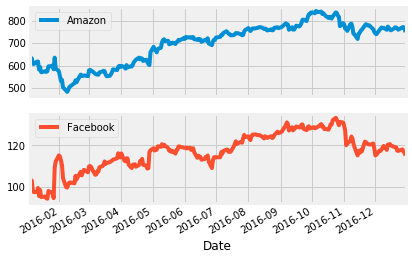

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


In [6]:
# visualize the stock_data
stock_data.plot(subplots=True)
plt_title = 'Stock Data'
plt.show()

# summarize the stock_data
stock_data.describe()

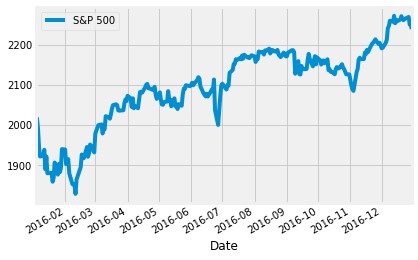

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [7]:
# plot the benchmark_data
benchmark_data.plot()
plt_title = 'S&P 500'
plt.show()

# summarize the benchmark_data
benchmark_data.describe()

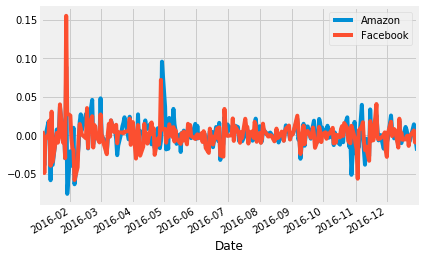

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [8]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()
plt.show()


# summarize the daily returns
stock_returns.describe()

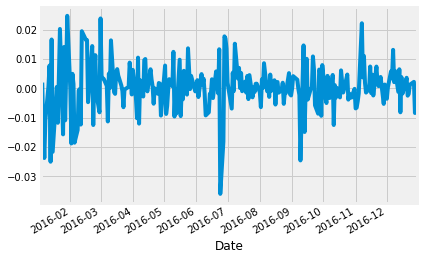

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

In [9]:
# calculate daily benchmark_data returns
# ... YOUR CODE FOR TASK 6 HERE ...
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()
plt.show()


# summarize the daily returns
sp_returns.describe()

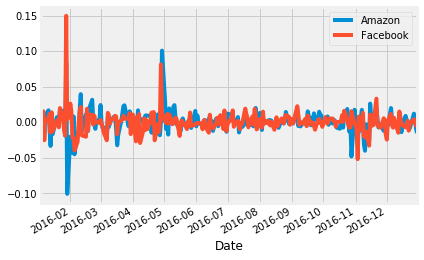

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


In [10]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot()
plt.show()


# summarize the excess_returns
excess_returns.describe()

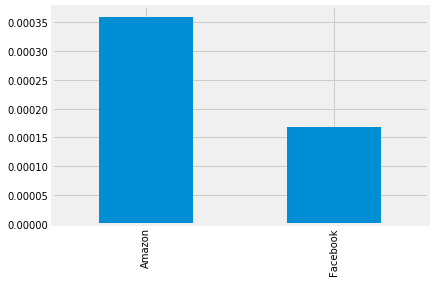

In [11]:
# calculate the mean of excess_returns 
# ... YOUR CODE FOR TASK 8 HERE ...
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar()
plt_title = 'Mean of the Return Difference'
plt.show()

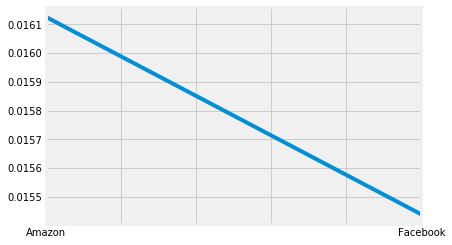

In [12]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot()
plt_title = 'Standard Deviation of the Return Difference'
plt.show()

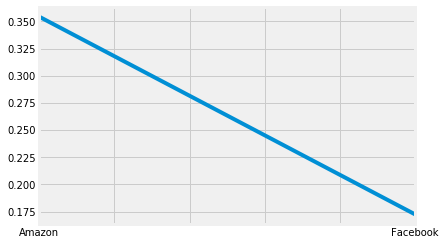

In [13]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot()
plt_title = 'Annualized Sharpe Ratio: Stocks vs S&P 500'
plt.show()